### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

# **Import necessary libraries**

In [129]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

import warnings
warnings.filterwarnings("ignore")

In [130]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import silhouette_visualizer

# **Load the dataset**

In [131]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"

df = pd.read_csv(url)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [132]:
#Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
df.describe

<bound method NDFrame.describe of       status_id status_type status_published  ...  Column2  Column3  Column4
0             1       video   4/22/2018 6:00  ...      NaN      NaN      NaN
1             2       photo  4/21/2018 22:45  ...      NaN      NaN      NaN
2             3       video   4/21/2018 6:17  ...      NaN      NaN      NaN
3             4       photo   4/21/2018 2:29  ...      NaN      NaN      NaN
4             5       photo   4/18/2018 3:22  ...      NaN      NaN      NaN
...         ...         ...              ...  ...      ...      ...      ...
7045       7046       photo   9/24/2016 2:58  ...      NaN      NaN      NaN
7046       7047       photo  9/23/2016 11:19  ...      NaN      NaN      NaN
7047       7048       photo  9/21/2016 23:03  ...      NaN      NaN      NaN
7048       7049       photo   9/20/2016 0:43  ...      NaN      NaN      NaN
7049       7050       photo  9/10/2016 10:30  ...      NaN      NaN      NaN

[7050 rows x 16 columns]>

In [133]:
#Perform EDA viz. Is there any missing values in each column of the provided dataset
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [134]:
df.shape

(7050, 16)

In [135]:
df.shape

(7050, 16)

In [136]:
df.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [137]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [138]:
df['Column1'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Column1, dtype: float64

In [139]:
df['Column2'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Column2, dtype: float64

In [140]:
df['Column3'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Column3, dtype: float64

In [141]:
df['Column4'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Column4, dtype: float64

In [142]:
df.drop(df.columns[12:], axis=1,inplace = True)

In [143]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [144]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [145]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [146]:
#Display all the unique status_type of the dataframe
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [147]:
# converting type of columns to 'category'
df['status_type'] = df['status_type'].astype('category')
# Assigning numerical values and storing in another column
df['Status_Type_Cat'] = df['status_type'].cat.codes
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Status_Type_Cat
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1


In [148]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Status_Type_Cat'] = labelencoder.fit_transform(df['status_type'])
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Status_Type_Cat
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1


In [149]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Status_Type_Cat'],
      dtype='object')

In [150]:
df.dtypes

status_id              int64
status_type         category
status_published      object
num_reactions          int64
num_comments           int64
num_shares             int64
num_likes              int64
num_loves              int64
num_wows               int64
num_hahas              int64
num_sads               int64
num_angrys             int64
Status_Type_Cat        int64
dtype: object

In [151]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Status_Type_Cat'],
      dtype='object')

###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [152]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [153]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [154]:
df.status_published_cat = df.status_published.astype('category')

In [155]:
df.info

<bound method DataFrame.info of       status_id status_type  ... num_angrys  Status_Type_Cat
0             1       video  ...          0                3
1             2       photo  ...          0                1
2             3       video  ...          0                3
3             4       photo  ...          0                1
4             5       photo  ...          0                1
...         ...         ...  ...        ...              ...
7045       7046       photo  ...          0                1
7046       7047       photo  ...          0                1
7047       7048       photo  ...          0                1
7048       7049       photo  ...          0                1
7049       7050       photo  ...          0                1

[7050 rows x 13 columns]>

In [156]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Status_Type_Cat
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [157]:
df.dtypes

status_id              int64
status_type         category
status_published      object
num_reactions          int64
num_comments           int64
num_shares             int64
num_likes              int64
num_loves              int64
num_wows               int64
num_hahas              int64
num_sads               int64
num_angrys             int64
Status_Type_Cat        int64
dtype: object

In [158]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Status_Type_Cat'],
      dtype='object')

In [159]:
df.drop(['status_type', 'status_published'], axis=1,inplace = True)

In [160]:
df.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Status_Type_Cat
0,1,529,512,262,432,92,3,1,1,0,3
1,2,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,3
3,4,111,0,0,111,0,0,0,0,0,1
4,5,213,0,0,204,9,0,0,0,0,1


In [161]:
df.dtypes

status_id          int64
num_reactions      int64
num_comments       int64
num_shares         int64
num_likes          int64
num_loves          int64
num_wows           int64
num_hahas          int64
num_sads           int64
num_angrys         int64
Status_Type_Cat    int64
dtype: object

In [162]:
# Defining the numerical and the categorical columns
numericalColumns = ['status_id', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys' ]
categoricalColumns = ['Status_Type_Cat','status_published']

In [163]:
df.dtypes

status_id          int64
num_reactions      int64
num_comments       int64
num_shares         int64
num_likes          int64
num_loves          int64
num_wows           int64
num_hahas          int64
num_sads           int64
num_angrys         int64
Status_Type_Cat    int64
dtype: object

Feature Scaling - selecting the features

In [164]:
###Task 2: Feature Scaling

#Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
from sklearn.preprocessing import MinMaxScaler
variables = ['status_id','num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']  



In [165]:
df.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Status_Type_Cat
0,1,529,512,262,432,92,3,1,1,0,3
1,2,150,0,0,150,0,0,0,0,0,1
2,3,227,236,57,204,21,1,1,0,0,3
3,4,111,0,0,111,0,0,0,0,0,1
4,5,213,0,0,204,9,0,0,0,0,1


In [166]:
# define min max scaler
X = df.loc[:, variables].values
y = df.Status_Type_Cat
X = pd.DataFrame(X)
scaler = MinMaxScaler()
# transform data
df_scaled = scaler.fit_transform(X)
print(df_scaled)

[[0.00000000e+00 1.12314225e-01 2.43925679e-02 ... 6.36942675e-03
  1.96078431e-02 0.00000000e+00]
 [1.41864094e-04 3.18471338e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.83728188e-04 4.81953291e-02 1.12434493e-02 ... 6.36942675e-03
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99716272e-01 4.24628450e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99858136e-01 7.45222930e-02 5.71700810e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.60934183e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [167]:
scaler = MinMaxScaler()
# transform data
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[0.00000000e+00 1.12314225e-01 2.43925679e-02 ... 1.96078431e-02
  0.00000000e+00 1.00000000e+00]
 [1.41864094e-04 3.18471338e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]
 [2.83728188e-04 4.81953291e-02 1.12434493e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [9.99716272e-01 4.24628450e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]
 [9.99858136e-01 7.45222930e-02 5.71700810e-04 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]
 [1.00000000e+00 3.60934183e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.33333333e-01]]


Let us visualize the correlation so that it will give us an idea of the relationship among the datasets

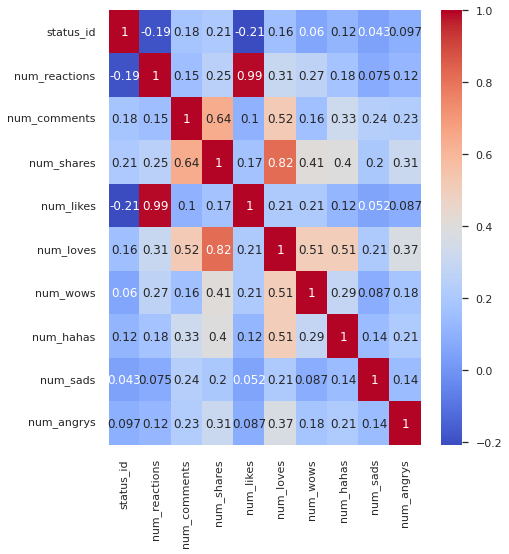

In [168]:
# Visualizing the correlation matrix for numerical columns
corrMatrix = df.loc[:,numericalColumns].corr()

sns.set(rc={'figure.figsize':(7,8)})
sns.heatmap(corrMatrix, cmap = 'coolwarm', annot = True)
plt.show()

This shows there are high correlation between:
* num_reactions and num_likes - 0.99
* num_loves and num_shares - 0.82
* num_comments and num_shares-0.64

In [169]:
#Use Elbow method to determine the number of cluster to be formed
# Getting the sum of squared distances for different values of k
sum_of_squared_distances = []
n = range(1,12)
for i in n:
    km = KMeans(n_clusters=i)
    km = km.fit(df_scaled)
    sum_of_squared_distances.append(km.inertia_)


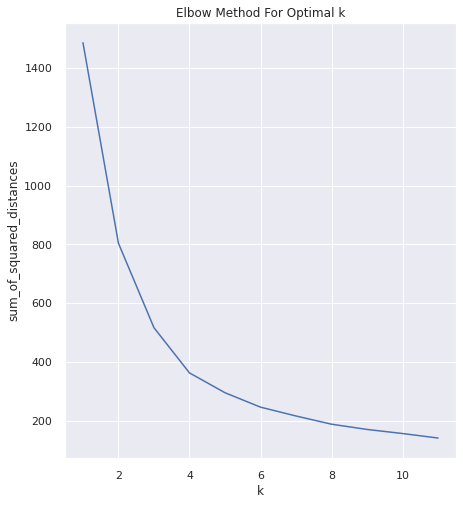

In [170]:
# Plotting the elbow plot
plt.plot(n, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

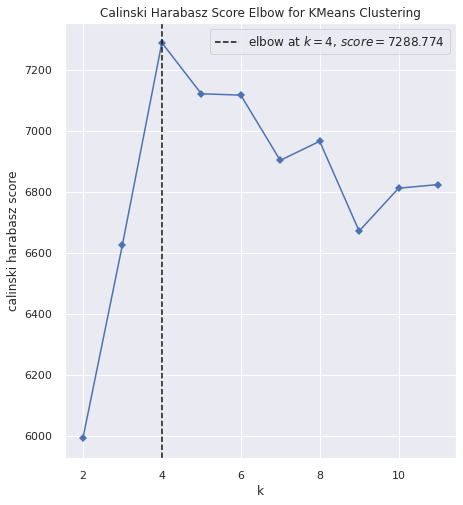

In [171]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [172]:
#Verify optimal number of clusers on the basis of silhouette scores
x = df_scaled.copy()


For n_clusters = 2 The average silhouette_score is : 0.49385918661629863
For n_clusters = 3 The average silhouette_score is : 0.5034869908722817
For n_clusters = 4 The average silhouette_score is : 0.5380961856013774
For n_clusters = 5 The average silhouette_score is : 0.5230949905337708
For n_clusters = 6 The average silhouette_score is : 0.5355215801596752
For n_clusters = 7 The average silhouette_score is : 0.4945772843492385
For n_clusters = 8 The average silhouette_score is : 0.4451958406656768
For n_clusters = 9 The average silhouette_score is : 0.5175010808694455
For n_clusters = 10 The average silhouette_score is : 0.5300020341119253


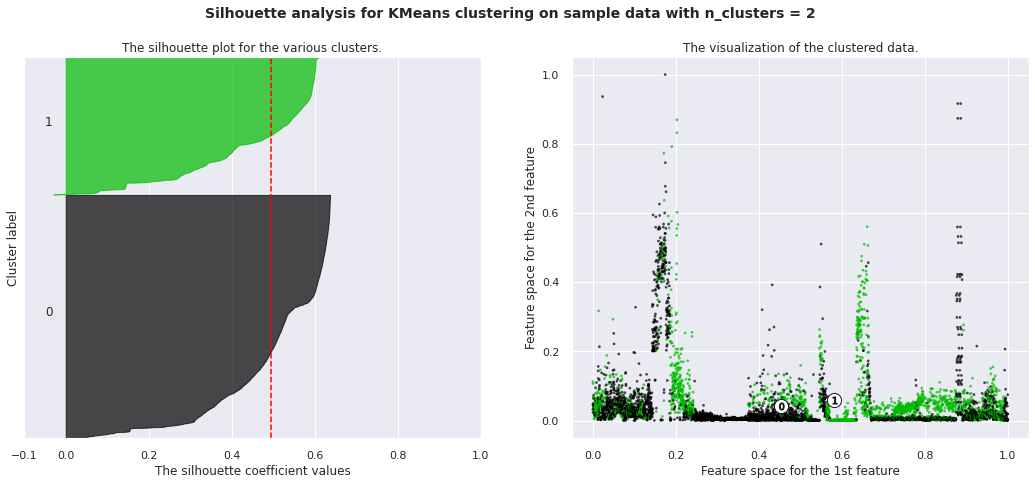

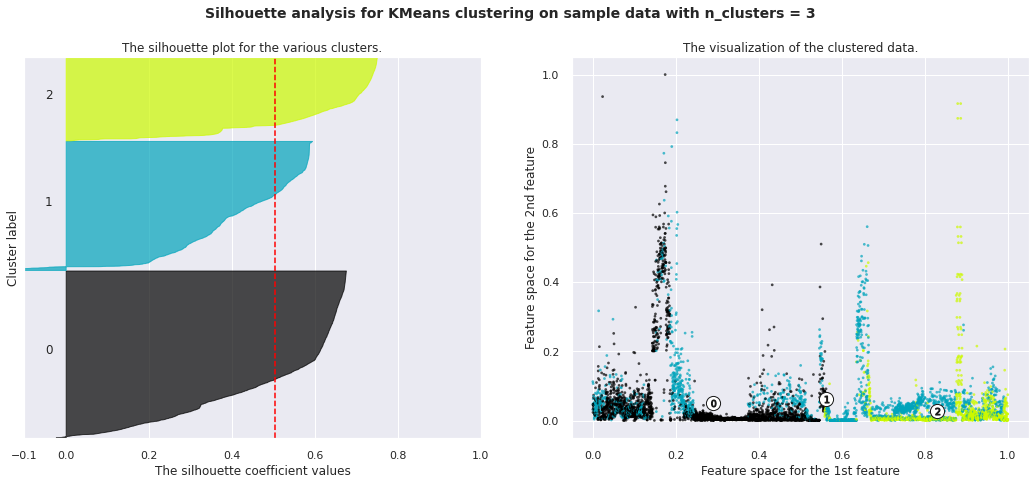

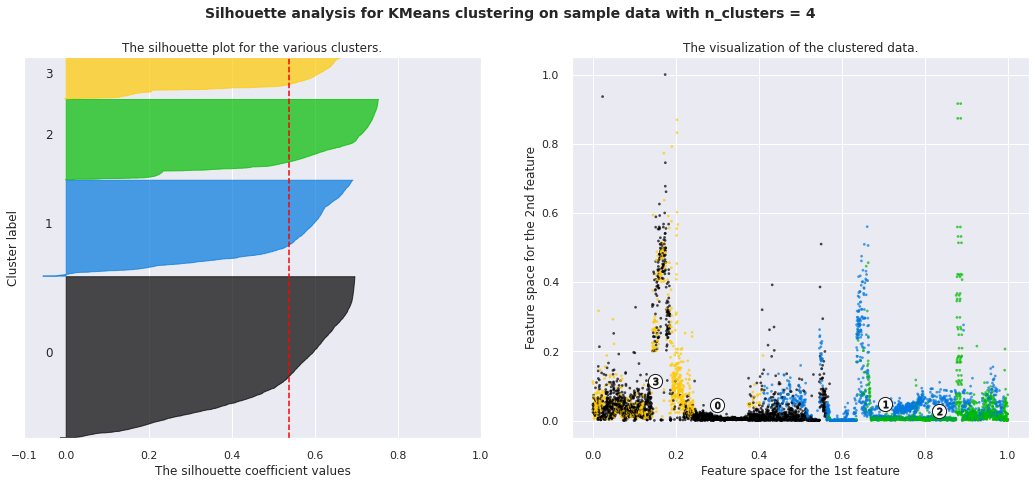

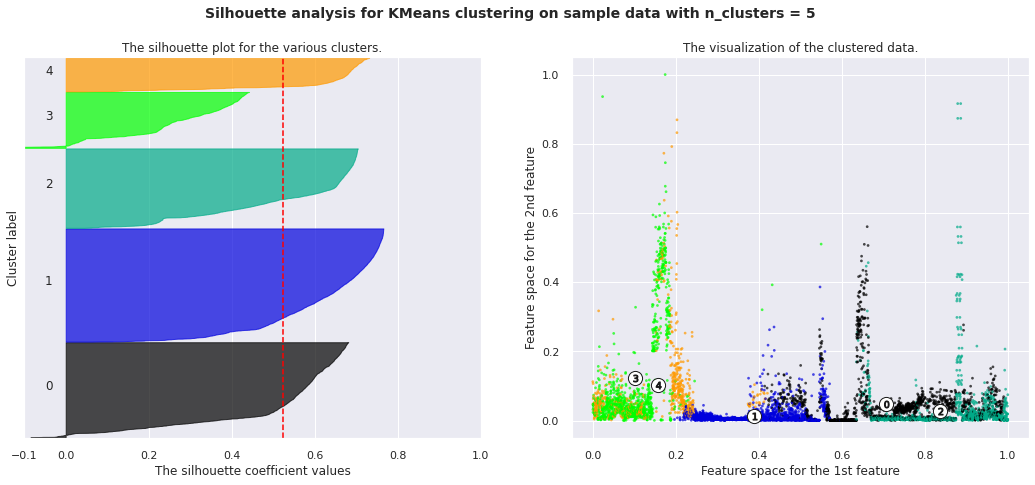

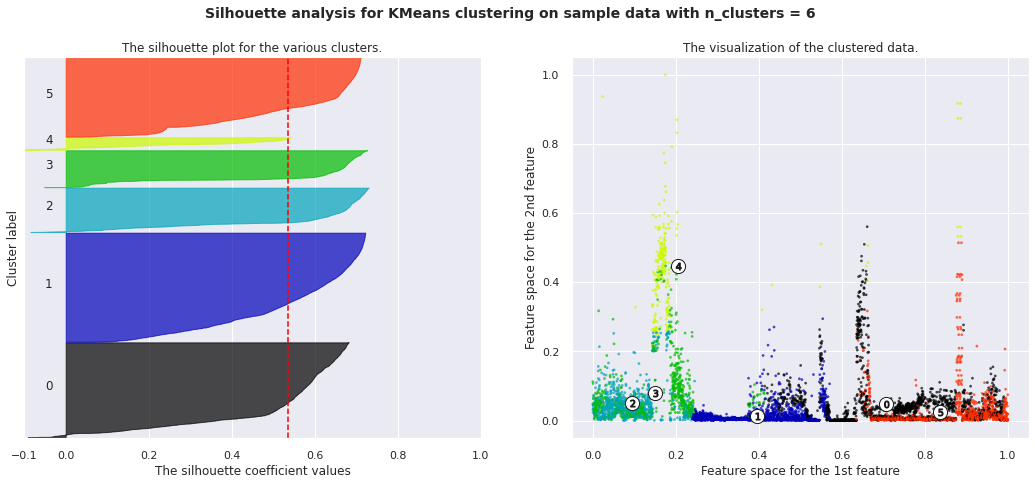

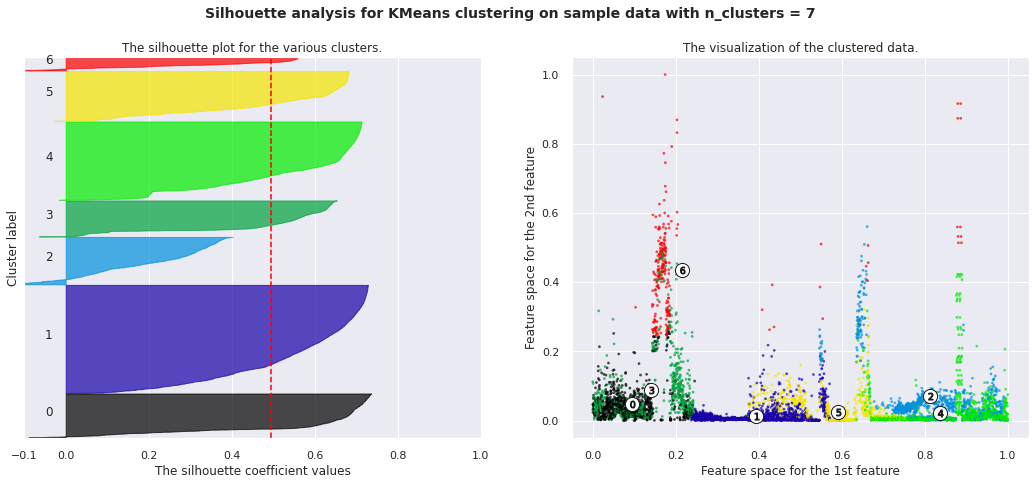

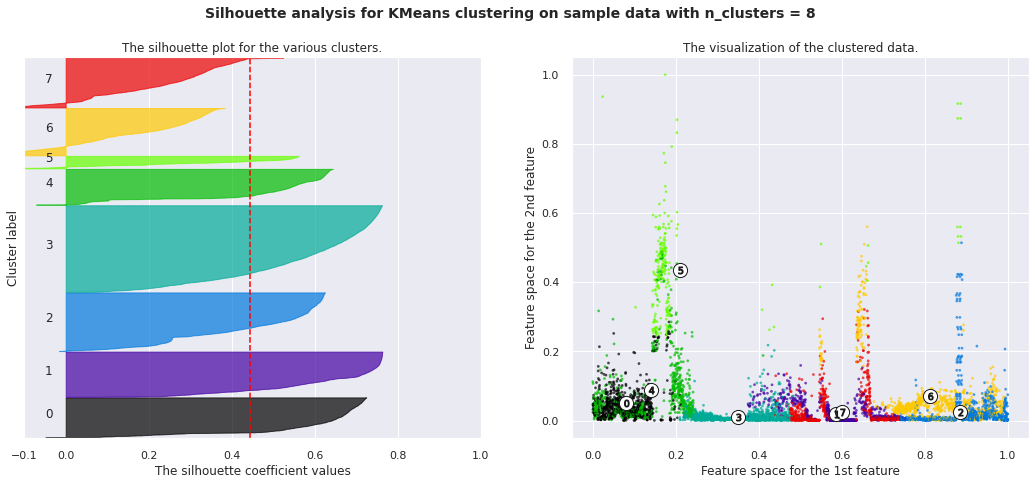

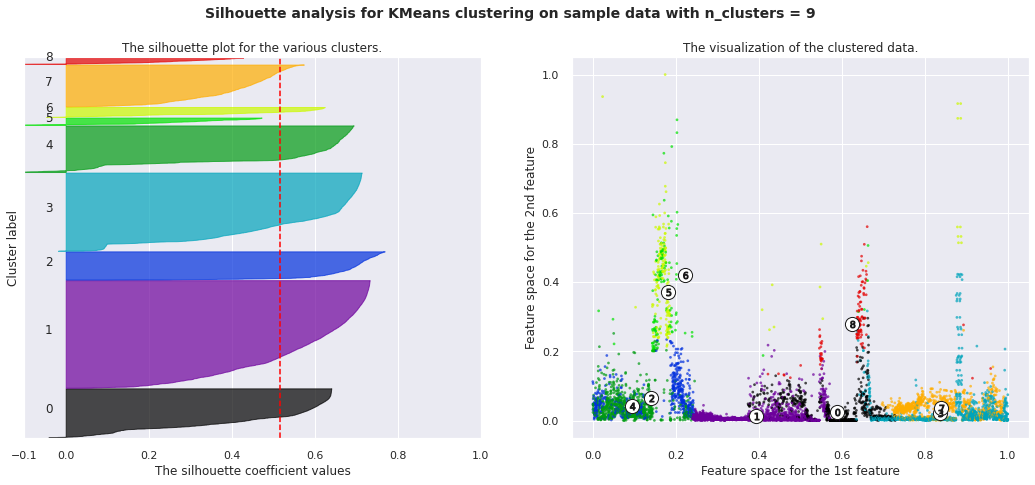

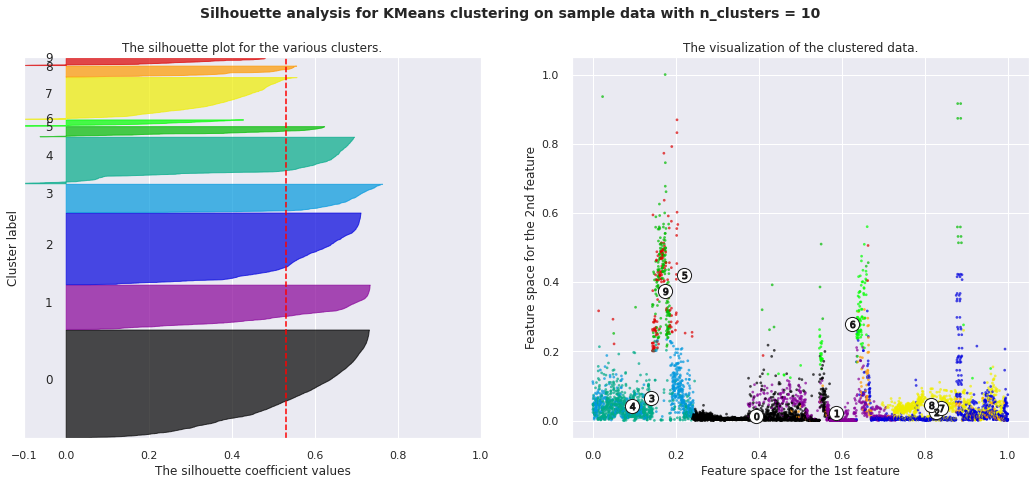

In [173]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [174]:
silhouette = []
for n_clusters in range(2,9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, preds)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49385918661629863)
For n_clusters = 3, silhouette score is 0.5034869908722815)
For n_clusters = 4, silhouette score is 0.5380961856013773)
For n_clusters = 5, silhouette score is 0.5287936499960437)
For n_clusters = 6, silhouette score is 0.5362467922955523)
For n_clusters = 7, silhouette score is 0.5411373513612278)
For n_clusters = 8, silhouette score is 0.5095623305721801)


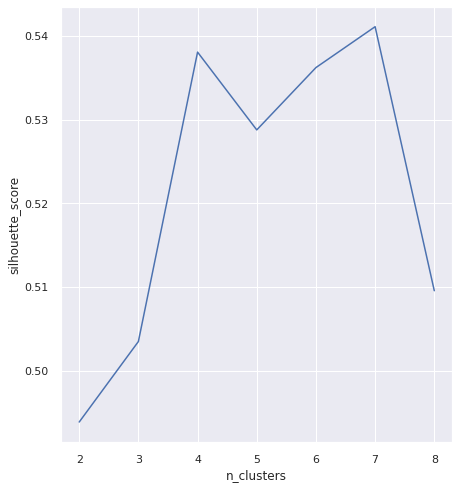

In [175]:
n_clusters = [x for x in range(2,9)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")

Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

In [177]:
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score

In [178]:
# Instantiate k-means,since kmeans = 4
kmeans = KMeans(n_clusters=4)


# Fit the algorithms to the features
kmeans.fit(df_scaled)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(df_scaled, kmeans.labels_).round(2)


In [179]:
kmeans_silhouette

0.54

Rand Index - It computes a similarity measure between two clusters by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

RI ranges from zero to 1, a perfect match.

In [180]:
ri_kmeans = rand_score(y, kmeans.labels_)
round(ri_kmeans,2)

0.77

Random Index/Score shows a very good score making the model to have a denser cluster because it is closer to +1

The Adjusted Rand index computes a similarity measure between two different clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters predicted, and the true clusterings, before adjusting for random chance. Note that the true labels must be known for this metric to be used.

The Adjusted Rand index is bounded between -1 and 1. Closer to 1 is good, while closer to -1 is bad.

In [181]:
ari_kmeans = adjusted_rand_score(y, kmeans.labels_)
round(ari_kmeans, 2)



0.53

Adjusted Random score of 0.53 is very good because it is more closer to 1 than -1.The score is higher and closer to +1 when clusters are dense and well separated, which relates to a standard concept of a cluster.

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [182]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [183]:
import pandas as pd
url = "https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv"
# load dataset into Pandas DataFrame
df1 = pd.read_csv(url)
df1.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [184]:
df1.dtypes

fruit_label      int64
mass             int64
width          float64
height         float64
color_score    float64
dtype: object

In [185]:
df1['fruit_label'].unique

<bound method Series.unique of 0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64>

In [186]:
#Use PCA to find the first two principal components of the fruit dataset


#Scale the value. Each feature should be centered (zero mean) and with unit variance

In [187]:
from scipy.stats import zscore
df_scaled = df1.apply(zscore)
print("Scaled Data")
df_scaled.head()

Scaled Data


,fruit_label,mass,width,height,color_score
0,-1.287707,0.529442,1.598690,-0.291397,-2.793595
1,-1.287707,0.309462,1.104854,-0.661922,-2.268684
2,-1.287707,0.236136,0.364100,-0.365502,-2.137456
3,-0.452820,-1.413709,-1.117409,-2.218131,0.487100
4,-0.452820,-1.450372,-1.364327,-2.292236,0.355872


In [188]:
cov = np.cov(df_scaled,rowvar = False)
print("covariance Matrix:")
print(cov)

covariance Matrix:
[[ 1.01724138  0.03330208 -0.30322903  0.51753738 -0.31587462]
 [ 0.03330208  1.01724138  0.89281992  0.62008109 -0.08116955]
 [-0.30322903  0.89281992  1.01724138  0.40369026 -0.07789578]
 [ 0.51753738  0.62008109  0.40369026  1.01724138 -0.25130655]
 [-0.31587462 -0.08116955 -0.07789578 -0.25130655  1.01724138]]


In [189]:
#Analysis - perform PCA with 4 components and print their explained variance_ratio
pca = PCA(n_components = 4)
pca.fit(df_scaled)

PCA(n_components=4)

In [190]:
print("Eigen values:")
print(pca.explained_variance_)


Eigen values:
[2.37600099 1.60143542 0.8170495  0.23522151]


In [191]:

#percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[0.46714596 0.31485849 0.16064024 0.04624694]


In [192]:
print("Eigen vectors:")
print(pca.components_)

Eigen vectors:
[[ 0.14254933  0.60981277  0.53738749  0.52890483 -0.19819798]
 [ 0.70965103 -0.20731942 -0.41503517  0.30761697 -0.43189314]
 [-0.32980304 -0.08739221  0.16380591 -0.30435493 -0.8741443 ]
 [ 0.54377746  0.38121737  0.15645672 -0.72998893  0.04021005]]


In [193]:
# based on the values chose 2 best components 
pca2= PCA(n_components=2)
pca2.fit(df_scaled)
print(pca2.components_)

[[ 0.14254933  0.60981277  0.53738749  0.52890483 -0.19819798]
 [ 0.70965103 -0.20731942 -0.41503517  0.30761697 -0.43189314]]


In [194]:
#percentage of variation explained ratio by each eigen Vector
print(pca2.explained_variance_ratio_)

[0.46714596 0.31485849]
